# Download sample data

We will use type 2 diabetes sumstats from BBJ as an example

In [1]:
!wget -O t2d_bbj.txt.gz http://jenger.riken.jp/14/

--2022-10-21 15:41:14--  http://jenger.riken.jp/14/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274187574 (261M) [text/plain]
Saving to: ‘t2d_bbj.txt.gz’

t2d_bbj.txt.gz      100%[===================>] 261.49M  38.0MB/s    in 7.3s    

2022-10-21 15:41:22 (36.0 MB/s) - ‘t2d_bbj.txt.gz’ saved [274187574/274187574]



next import gwaslab as gl

In [2]:
import sys
sys.path.insert(0,"/Users/he/work/gwaslab/src")
import gwaslab as gl

# Loading data into gwaslab Sumstats

In [3]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             n="N")

Fri Oct 21 15:41:28 2022 Start to initiate from file :t2d_bbj.txt.gz
Fri Oct 21 15:41:56 2022  -Reading columns          : SE,CHR,ALT,REF,POS,SNP,N,BETA,Dir,Frq,P
Fri Oct 21 15:41:56 2022  -Renaming columns to      : SE,CHR,EA,NEA,POS,SNPID,N,BETA,DIRECTION,EAF,P
Fri Oct 21 15:41:56 2022  -Current dataframe shape  : Rows  12557761  x  11  Columns
Fri Oct 21 15:42:01 2022  -Initiating a status column ...
Fri Oct 21 15:42:02 2022  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
Fri Oct 21 15:42:04 2022  -NEAF is specified...
Fri Oct 21 15:42:04 2022  -Checking if 0<= NEAF <=1 ...
Fri Oct 21 15:42:06 2022  -Converted NEAF to EAF.
Fri Oct 21 15:42:06 2022  -Removed 0 variants with bad NEAF.
Fri Oct 21 15:42:06 2022 Finished loading data successfully!


Sumstats are stored in pandas.DataFrame, you can check the data by: 

In [4]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9999999
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9999999
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9999999
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9999999
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9999999
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,X,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9999999
12557757,X:154875192_GTACTC_G,X,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9999999
12557758,X:154879115_A_G,X,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9999999
12557759,X:154880669_T_A,X,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9999999


For details, see: https://cloufield.github.io/gwaslab/SumstatsObject/

# Fix_id

we want SNPID to be in a stadardized format chr:pos:ref:alt, we can use fix_id for this

For other options, see: https://cloufield.github.io/gwaslab/Standardization/

In [5]:
mysumstats.fix_id(fixsep=True)

Fri Oct 21 15:42:49 2022 Start to check IDs...
Fri Oct 21 15:42:49 2022  -Current Dataframe shape : 12557761  x  12
Fri Oct 21 15:42:49 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Oct 21 15:43:10 2022  -Replacing [_-] in SNPID with ":" ...
Fri Oct 21 15:43:28 2022 Finished checking IDs successfully!


In [6]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932:G:A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9969999
1,1:725933:A:G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9969999
2,1:737801:T:C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9969999
3,1:749963:T:TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9969999
4,1:751343:T:A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9969999
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837:A:G,X,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9969999
12557757,X:154875192:GTACTC:G,X,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9969999
12557758,X:154879115:A:G,X,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9969999
12557759,X:154880669:T:A,X,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9969999


# Plot mqq

create manhattan and qq plots:
For details, see: https://cloufield.github.io/gwaslab/Visualization/

Fri Oct 21 15:44:07 2022 Start to plot manhattan/qq plot with the following basic settings:
Fri Oct 21 15:44:07 2022  -Genome-wide significance level is set to 5e-08 ...
Fri Oct 21 15:44:07 2022  -Raw input contains 12557761 variants...
Fri Oct 21 15:44:07 2022  -Plot layout mode is : mqq
Fri Oct 21 15:44:17 2022 Finished loading specified columns from the sumstats.
Fri Oct 21 15:44:17 2022 Start conversion and sanity check:
Fri Oct 21 15:44:20 2022  -Removed 328791 variants with nan in CHR or POS column ...
Fri Oct 21 15:44:21 2022  -Removed 0 variants with nan in P column ...
Fri Oct 21 15:44:21 2022  -P values are being converted to -log10(P)...
Fri Oct 21 15:44:21 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Oct 21 15:44:22 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Oct 21 15:44:25 2022  -Maximum -log10(P) values is 167.58838029403677 .
Fri Oct 21 15:44:25 2022 Finished data conversion and sanity check

(<Figure size 1500x500 with 2 Axes>, <gwaslab.Log.Log at 0x7f821b304130>)

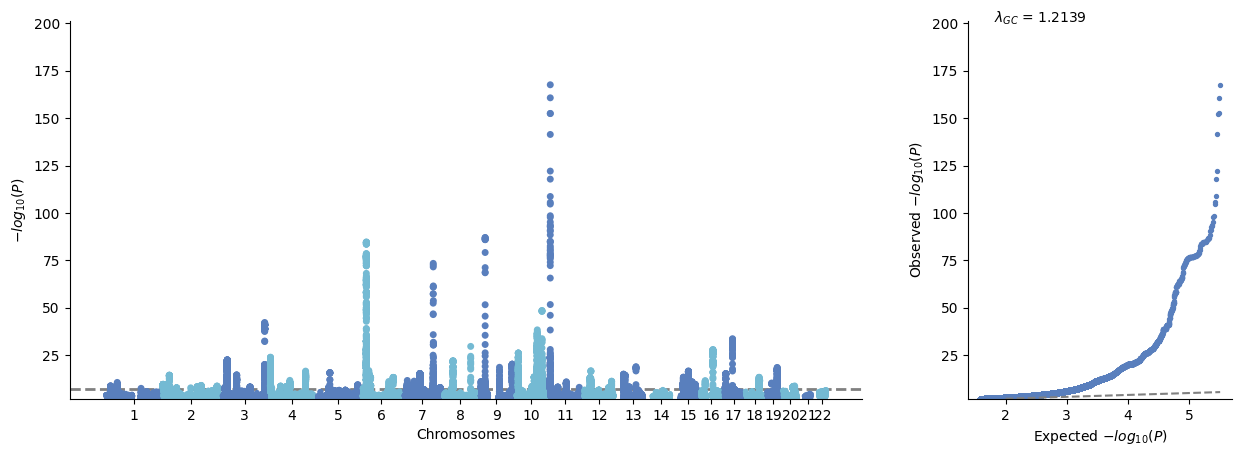

In [7]:
mysumstats.plot_mqq(skip=2)

# Standardization & QC : basic_check()

For other options, see: https://cloufield.github.io/gwaslab/Standardization/

#check SNPID,rsID,CHR,POS,EA and NEA

In [8]:
mysumstats.basic_check()

Fri Oct 21 15:45:47 2022 Start to check IDs...
Fri Oct 21 15:45:47 2022  -Current Dataframe shape : 12557761  x  12
Fri Oct 21 15:45:47 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Fri Oct 21 15:46:32 2022 Finished checking IDs successfully!
Fri Oct 21 15:46:32 2022 Start to fix chromosome notation...
Fri Oct 21 15:46:32 2022  -Current Dataframe shape : 12557761  x  12
Fri Oct 21 15:47:23 2022  -Vairants with fixable chromosome notations: 328791
Fri Oct 21 15:47:26 2022  -Converting to string datatype and UPPERCASE...
Fri Oct 21 15:47:27 2022  -Stripping chr prefix if exists : CHR_-.0...
Fri Oct 21 15:47:31 2022  -Identified  328791  variants on sex chromosomes...
Fri Oct 21 15:47:32 2022  -Standardizing sex chromosome notations: X Y MT  to 23,24,25...
Fri Oct 21 15:48:08 2022  -No unrecognized chromosome notations...
Fri Oct 21 15:48:15 2022 Finished fixing chromosome notation successfully!
Fri Oct 21 15:48:15 2022 Start to fix basepair positions...
Fri Oct 21 1

# Extract lead variants : get_lead()

For other options, see: https://cloufield.github.io/gwaslab/ExtractLead/

In [9]:
mysumstats.get_lead(anno=True)

Fri Oct 21 15:52:51 2022 Start to extract lead variants...
Fri Oct 21 15:52:51 2022  -Processing 12557761 variants...
Fri Oct 21 15:52:51 2022  -Significance threshold : 5e-08
Fri Oct 21 15:52:51 2022  -Sliding window size: 500  kb
Fri Oct 21 15:53:00 2022  -Found 9461 significant variants in total...
Fri Oct 21 15:53:01 2022  -Identified 89 lead variants!
Fri Oct 21 15:53:01 2022 Start to annotate variants with nearest gene name(s)...
Fri Oct 21 15:53:01 2022  -Assigning Gene name using built-in Ensembl Release 75  (hg19)
Fri Oct 21 15:53:07 2022 Finished annotating variants with nearest gene name(s) successfully!
Fri Oct 21 15:53:07 2022 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS,LOCATION,GENE
96739,1:22068326:A:G,1,22068326,G,A,0.7550,0.0621,0.0103,1.629000e-09,191764,++++,9960099,0,USP48
213860,1:51103268:T:C,1,51103268,C,T,0.7953,-0.0802,0.0120,2.519000e-11,191764,----,9960099,0,FAF1
534095,1:154309595:TA:T,1,154309595,TA,T,0.0947,-0.0915,0.0166,3.289000e-08,191764,----,9960399,0,ATP8B2
969974,2:640986:CACAT:C,2,640986,C,CACAT,0.9006,-0.0946,0.0150,2.665000e-10,191764,----,9960399,26349,TMEM18
1091807,2:27734972:G:A,2,27734972,G,A,0.5605,0.0691,0.0088,3.897000e-15,191764,++++,9960099,0,GCKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272930,X:21569920:A:G,23,21569920,G,A,0.3190,0.0423,0.0076,2.616000e-08,191764,++++,9960099,0,CNKSR2
12341406,X:48724648:CAA:C,23,48724648,C,CAA,0.6260,-0.0602,0.0103,4.576000e-09,191764,----,9960399,26082,TIMM17B
12350767,X:57170781:A:AT,23,57170781,AT,A,0.3003,-0.0447,0.0076,4.583000e-09,191764,----,9960399,-6723,SPIN2A
12469290,X:117915163:T:TA,23,117915163,TA,T,0.5560,0.0548,0.0071,9.818000e-15,191764,++++,9960399,0,IL13RA1


# Use the snpid to plot some highly customized mqq plot

For details, see: https://cloufield.github.io/gwaslab/Visualization/

Fri Oct 21 15:56:51 2022 Start to plot manhattan/qq plot with the following basic settings:
Fri Oct 21 15:56:51 2022  -Genome-wide significance level is set to 5e-08 ...
Fri Oct 21 15:56:51 2022  -Raw input contains 12557761 variants...
Fri Oct 21 15:56:51 2022  -Plot layout mode is : mqq
Fri Oct 21 15:56:51 2022  -Variants to pinpoint : 9:22132729:A:G,6:20688121:T:A,9:22132729:A:G,15:62394264:G:C
Fri Oct 21 15:56:51 2022  -Loci to highlight : 7:127253550:C:T,19:46166604:C:T
Fri Oct 21 15:56:51 2022  -Highlight_window is set to:  1000  kb
Fri Oct 21 15:56:51 2022  -Variants to pinpoint : 7:127253550:C:T,19:46166604:C:T
Fri Oct 21 15:57:03 2022 Finished loading specified columns from the sumstats.
Fri Oct 21 15:57:03 2022 Start conversion and sanity check:
Fri Oct 21 15:57:10 2022  -Removed 0 variants with nan in CHR or POS column ...
Fri Oct 21 15:57:12 2022  -Removed 0 variants with nan in EAF column ...
Fri Oct 21 15:57:16 2022  -Removed 0 variants with nan in P column ...
Fri Oct 21

(<Figure size 4500x1500 with 2 Axes>, <gwaslab.Log.Log at 0x7f821b304130>)

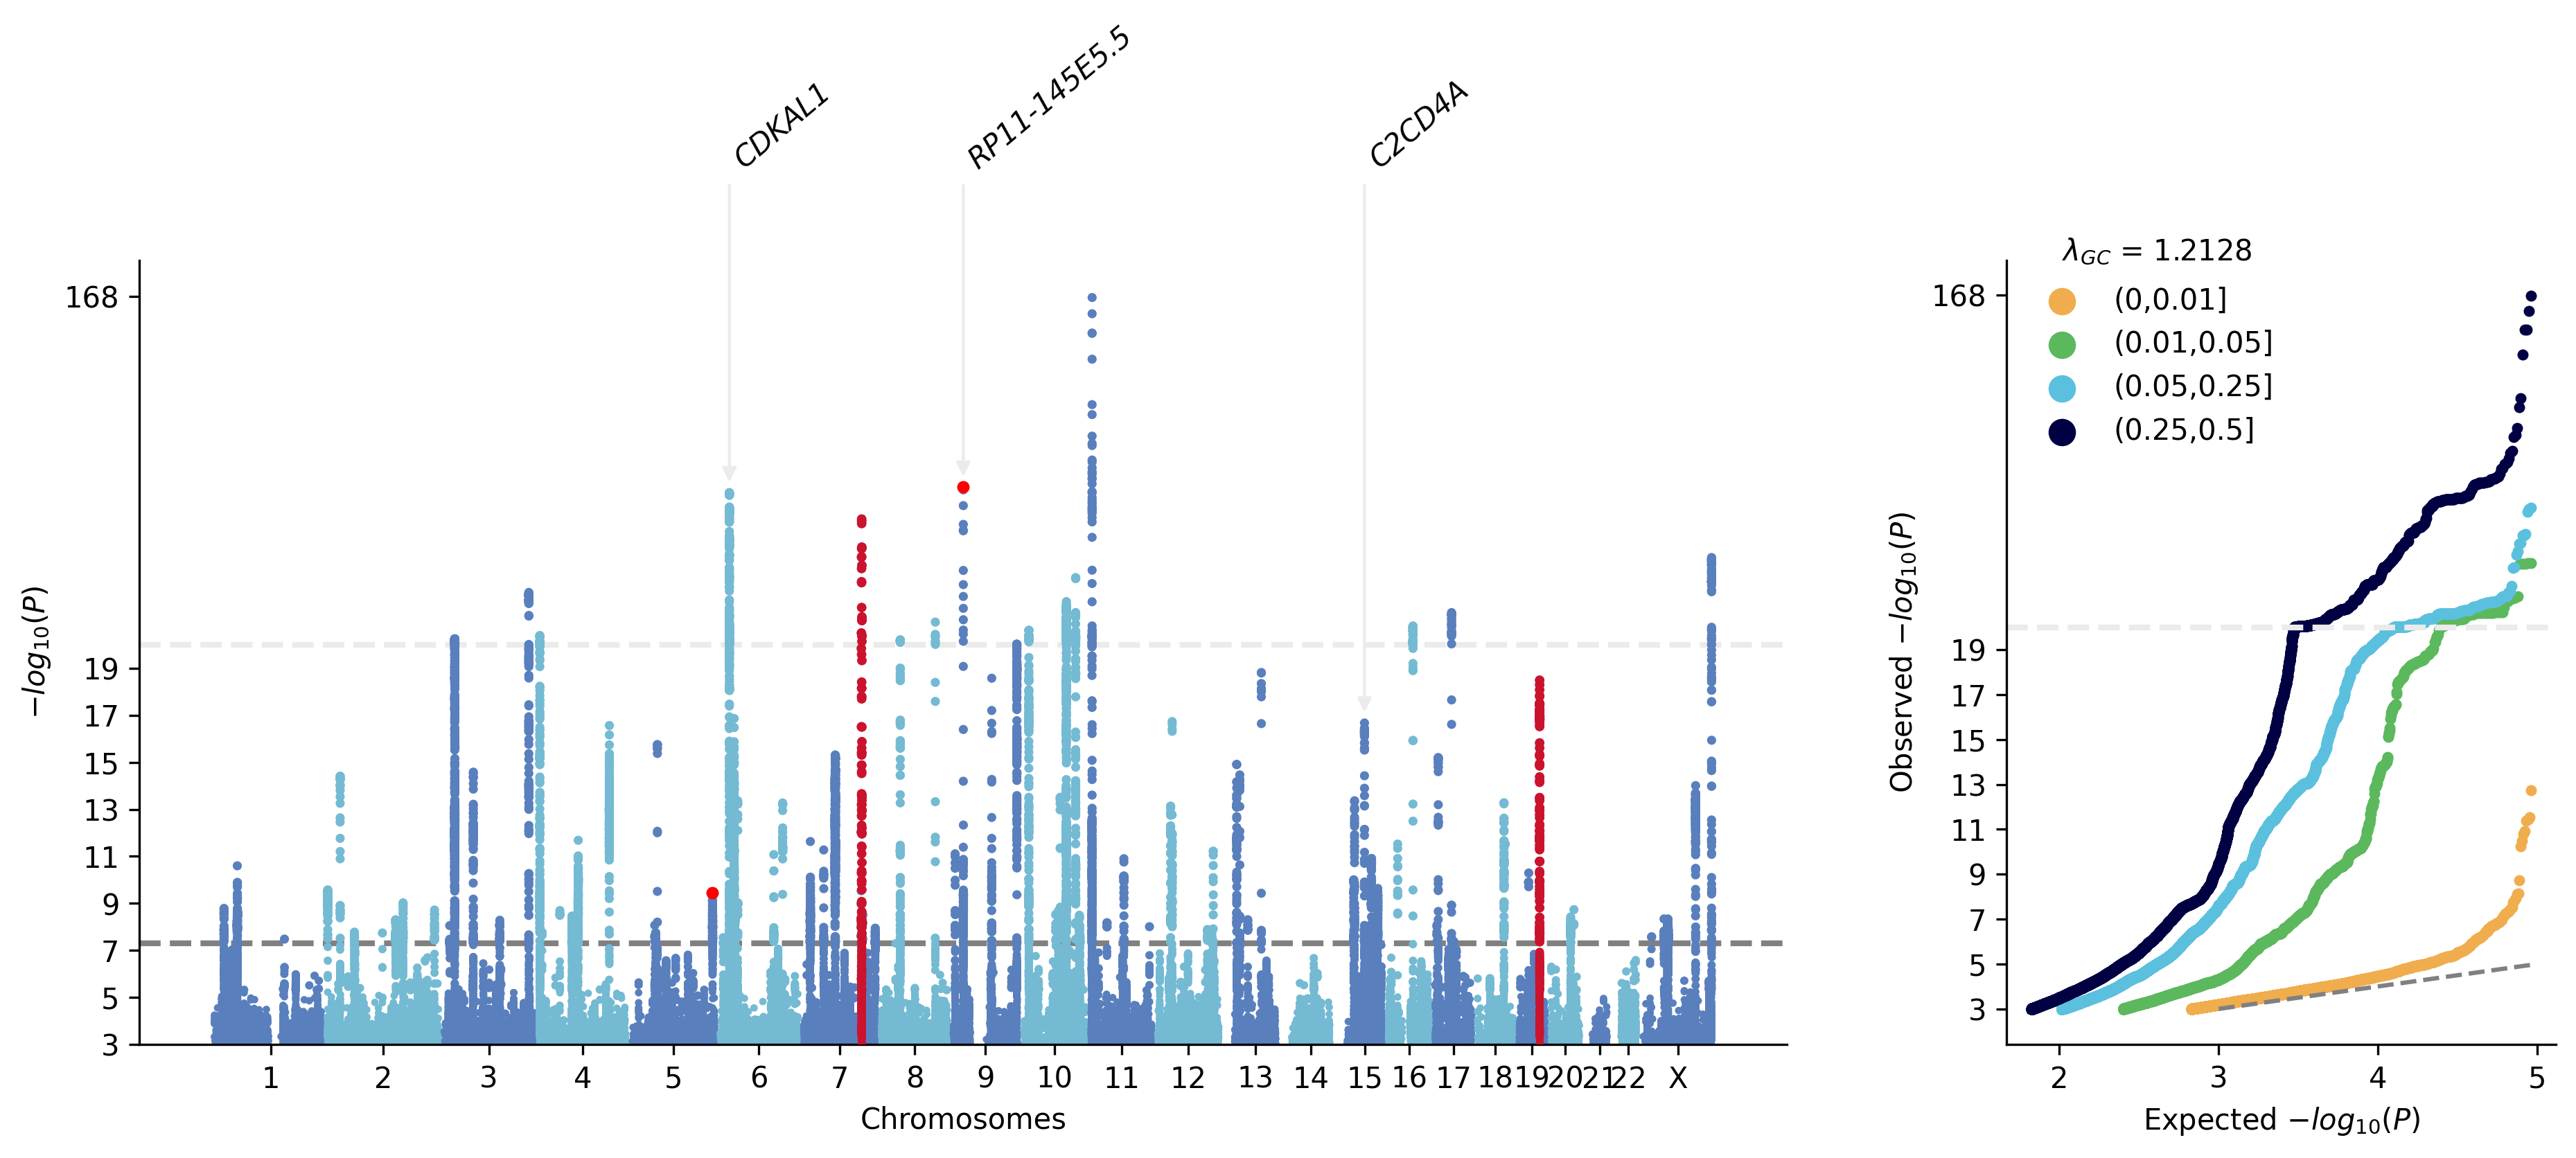

In [13]:
mysumstats.plot_mqq(mode="mqq",
                  cut=20,skip=3,
                  anno="GENENAME",anno_set=["9:22132729:A:G","6:20688121:T:A","9:22132729:A:G","15:62394264:G:C"] ,
                  pinpoint=["9:22132729:A:G","5:176513896:C:A"], 
                  highlight=["7:127253550:C:T","19:46166604:C:T"],
                  highlight_windowkb =1000,
                  stratified=True,
                  marker_size=(5,10),
                  figargs={"figsize":(15,5),"dpi":300})

# Quick regional plot without LD-information

For details see: https://cloufield.github.io/gwaslab/RegionalPlot/

Fri Oct 21 15:53:53 2022 Start to plot manhattan/qq plot with the following basic settings:
Fri Oct 21 15:53:53 2022  -Genome-wide significance level is set to 5e-08 ...
Fri Oct 21 15:53:53 2022  -Raw input contains 12557761 variants...
Fri Oct 21 15:53:53 2022  -Plot layout mode is : r
Fri Oct 21 15:53:53 2022  -Region to plot : chr7:156538803-157538803.
Fri Oct 21 15:53:56 2022  -Extract SNPs in region : chr7:156538803-157538803...
Fri Oct 21 15:54:36 2022  -Extract SNPs in specified regions: 5831
Fri Oct 21 15:54:36 2022 Finished loading specified columns from the sumstats.
Fri Oct 21 15:54:36 2022 Start conversion and sanity check:
Fri Oct 21 15:54:36 2022  -Removed 0 variants with nan in P column ...
Fri Oct 21 15:54:36 2022  -P values are being converted to -log10(P)...
Fri Oct 21 15:54:36 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Oct 21 15:54:36 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Oct 21 1

(<Figure size 1500x1000 with 3 Axes>, <gwaslab.Log.Log at 0x7f821b304130>)

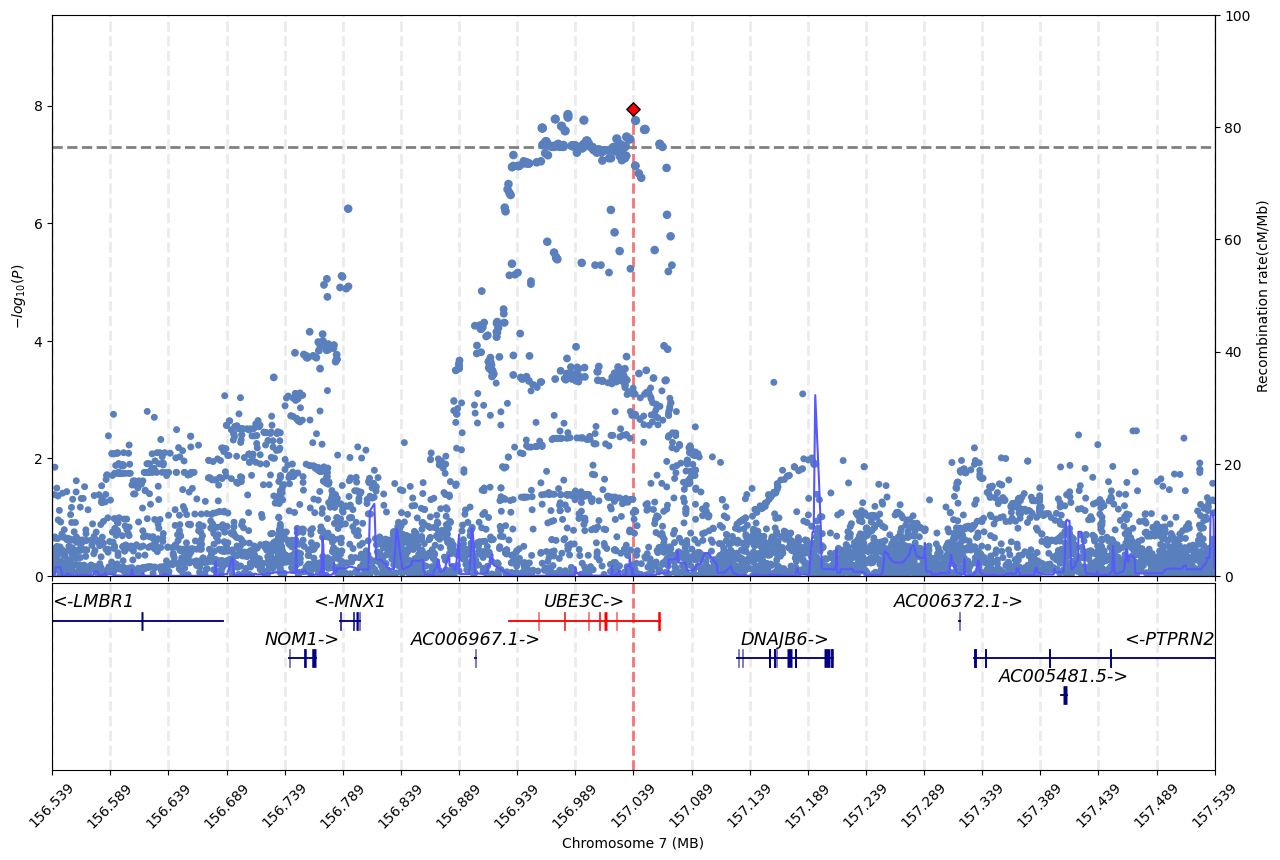

In [11]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803),region_grid=True)

Full regional plot using a user-provided vcf 
(e.g 1000 genome, see Reference: https://cloufield.github.io/gwaslab/Reference/)

Fri Oct 21 15:54:52 2022 Start to plot manhattan/qq plot with the following basic settings:
Fri Oct 21 15:54:52 2022  -Genome-wide significance level is set to 5e-08 ...
Fri Oct 21 15:54:52 2022  -Raw input contains 12557761 variants...
Fri Oct 21 15:54:52 2022  -Plot layout mode is : r
Fri Oct 21 15:54:52 2022  -Region to plot : chr7:156538803-157538803.
Fri Oct 21 15:54:52 2022  -Extract SNPs in region : chr7:156538803-157538803...
Fri Oct 21 15:55:28 2022  -Extract SNPs in specified regions: 5831
Fri Oct 21 15:55:29 2022 Finished loading specified columns from the sumstats.
Fri Oct 21 15:55:29 2022 Start conversion and sanity check:
Fri Oct 21 15:55:29 2022  -Removed 0 variants with nan in P column ...
Fri Oct 21 15:55:29 2022  -P values are being converted to -log10(P)...
Fri Oct 21 15:55:29 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Oct 21 15:55:29 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Oct 21 1

(<Figure size 1500x1000 with 4 Axes>, <gwaslab.Log.Log at 0x7f821b304130>)

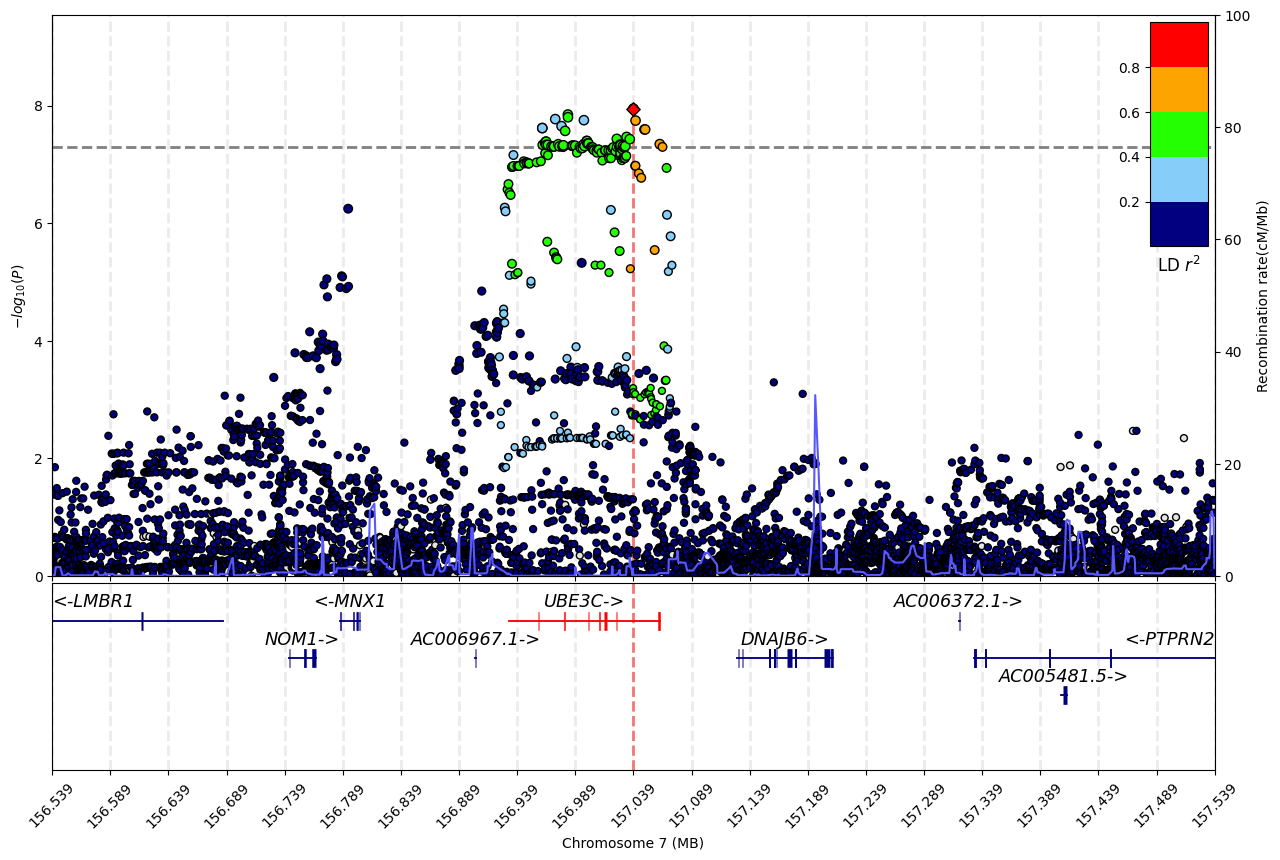

In [12]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803),region_grid=True,
                    vcf_path="/Users/he/Documents/Mydata/eas_1kg_af/EAS.chr7.split_norm_af.1kgp3v5.vcf.gz")

Fri Oct 21 15:59:57 2022 Start to plot manhattan/qq plot with the following basic settings:
Fri Oct 21 15:59:57 2022  -Genome-wide significance level is set to 5e-08 ...
Fri Oct 21 15:59:57 2022  -Raw input contains 12557761 variants...
Fri Oct 21 15:59:57 2022  -Plot layout mode is : r
Fri Oct 21 15:59:57 2022  -Region to plot : chr7:156538803-157538803.
Fri Oct 21 15:59:58 2022  -Extract SNPs in region : chr7:156538803-157538803...
Fri Oct 21 16:00:29 2022  -Extract SNPs in specified regions: 5831
Fri Oct 21 16:00:29 2022 Finished loading specified columns from the sumstats.
Fri Oct 21 16:00:29 2022 Start conversion and sanity check:
Fri Oct 21 16:00:29 2022  -Removed 0 variants with nan in P column ...
Fri Oct 21 16:00:29 2022  -P values are being converted to -log10(P)...
Fri Oct 21 16:00:29 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Fri Oct 21 16:00:29 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Fri Oct 21 1

(<Figure size 1500x1000 with 4 Axes>, <gwaslab.Log.Log at 0x7f821b304130>)

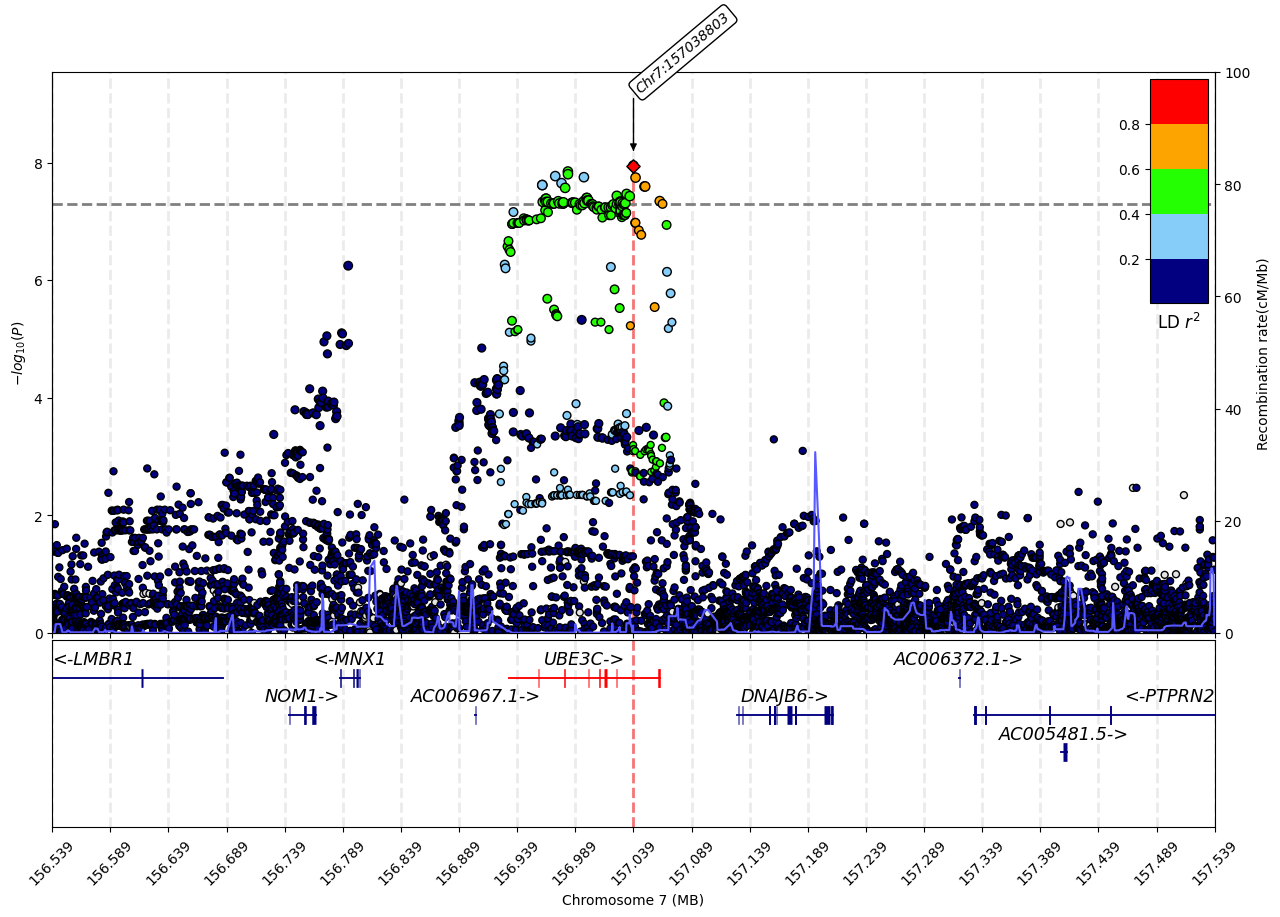

In [14]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803),region_grid=True,anno=True,
                    vcf_path="/Users/he/Documents/Mydata/eas_1kg_af/EAS.chr7.split_norm_af.1kgp3v5.vcf.gz")

# Sampling

since it might take a while to process the entire datasets, let us just random sample 1 million variants for this tutorial

In [19]:
mysumstats.random_variants(n=100000)

Fri Oct 21 16:05:25 2022  -Start to romdomly select variants from the sumstats...
Fri Oct 21 16:05:26 2022  -Finished sampling...


# Infer genome build

For details, see: https://cloufield.github.io/gwaslab/InferBuild/

In [20]:
# In case you don't know the genome build of the sumstats 

In [21]:
mysumstats.infer_build()

Fri Oct 21 16:05:29 2022  -Start to infer genome build version using hapmap3 SNPs...
Fri Oct 21 16:05:29 2022  -Loading Hapmap3 variants data...
Fri Oct 21 16:05:30 2022  -chr:pos will be used for matching...
Fri Oct 21 16:05:32 2022  -Matching variants for hg19: num_hg19= 8702
Fri Oct 21 16:05:32 2022  -Matching variants for hg38: num_hg38= 117
Fri Oct 21 16:05:32 2022  -Since num_hg19>num_hg38, assigning genome build hg19...


# Harmonise

In [22]:
#ref_seq : reference genome fasta file for allele alignment
#ref_rsid_tsv : tsv file for annotation of common used variants
#ref_rsid_vcf : vcf file for annotation of other variants
#ref_infer : vcf file with allele frequency information for inferring strand and comparing allele frequency 
#ref_alt_freq : field in INFO of vcf file for alternative allele frequency

In [23]:
# let try with only 10k varinats
#mysumstats.random_variants(n=10000)

For details see: https://cloufield.github.io/gwaslab/Harmonization/

In [24]:
mysumstats.harmonize(basic_check=False,
                    n_cores=3,
                    ref_seq="/Users/he/Documents/Mydata/human_g1k_v37.fasta",
                    ref_rsid_tsv="/Users/he/Documents/Mydata/EAS_1kg_af_dbsnp151.ALL.tsv",
                    ref_rsid_vcf="/Users/he/Documents/Mydata/All_20180423.vcf.gz",
                    ref_infer="/Users/he/Documents/Mydata/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz",ref_alt_freq="AF")

Fri Oct 21 16:05:39 2022 Start to check if NEA is aligned with reference sequence...
Fri Oct 21 16:05:39 2022  -Current Dataframe shape : 100000  x  12
Fri Oct 21 16:05:39 2022  -Reference genome fasta file: /Users/he/Documents/Mydata/human_g1k_v37.fasta
Fri Oct 21 16:05:39 2022  -Checking records: 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  X  Y  MT  
Fri Oct 21 16:06:11 2022  -Variants allele on given reference sequence :  41646
Fri Oct 21 16:06:11 2022  -Variants flipped :  50095
Fri Oct 21 16:06:11 2022   -Raw Matching rate :  91.74%
Fri Oct 21 16:06:11 2022  -Variants inferred reverse_complement :  0
Fri Oct 21 16:06:11 2022  -Variants inferred reverse_complement_flipped :  0
Fri Oct 21 16:06:11 2022  -Both allele on genome + unable to distinguish :  8259
Fri Oct 21 16:06:11 2022  -Variants not on given reference sequence :  0
Fri Oct 21 16:06:11 2022  -Current Dataframe shape : 100000  x  12
Fri Oct 21 16:06:12 2022 Start to flip allele-specific

In [25]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:754964:C:T,rs3131966,1,754964,T,C,0.7488,0.0235,0.0157,0.13360,166718,-?++,1960010
1,1:848654:TG:T,rs5772026,1,848654,T,TG,0.1296,0.0038,0.0145,0.79200,191764,++0-,1960364
2,1:852133:C:T,rs7518702,1,852133,T,C,0.7089,0.0266,0.0157,0.09007,166718,+?+-,1960010
3,1:863499:T:C,rs28718350,1,863499,C,T,0.0502,-0.0466,0.0399,0.24340,166718,-?--,1960000
4,1:885945:G:C,rs28535998,1,885945,C,G,0.1552,-0.0237,0.0139,0.08759,166718,-?-+,1960011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:154174631:C:T,rs4898400,23,154174631,T,C,0.0970,0.0117,0.0119,0.32400,191764,+-++,1960010
99996,X:154454081:T:C,rs141030762,23,154454081,C,T,0.0800,-0.0011,0.0159,0.94530,191764,+-+-,1960000
99997,X:154561955:T:TTAA,rs200473316,23,154561955,TTAA,T,0.2199,0.0084,0.0088,0.34090,191764,+-+-,1960368
99998,X:154618195:T:A,rs112133261,23,154618195,A,T,0.0944,0.0077,0.0160,0.62850,191764,+-+-,1960018


Check the summary of the currrent sumstats (see: https://cloufield.github.io/gwaslab/StatusCode/):

In [26]:
mysumstats.summary()

Values  Percentage
Category Items                                                   
META     Row_num                               100000         NaN
         Column_num                                 6         NaN
         Column_names       SNPID,rsID,EAF,P,N,STATUS         NaN
         Last_checked_time   Fri Oct 21 16:12:18 2022         NaN
MISSING  Missing_total                            582        0.58
         Missing_rsID                             582        0.58
MAF      Common                                 50552       50.55
         Low_frequency                          17030       17.03
         Rare                                   32366       32.37
P        Minimum                            1.361e-77        0.00
         Significant                               65        0.06
         Suggestive                               136        0.14
STATUS   1960010                                42897       42.90
         1960000                                34048       34.05
         1960001                                 6265        6.26
         1960011                                 6191        6.19
         1960364                                 4468        4.47
         1960363                                 3520        3.52
         1960007                                  620        0.62
         1960017                                  612        0.61
         1960309                                  551        0.55
         1960368                                  271        0.27
         1960319                                  199        0.20
         1960018                                  186        0.19
         1960008                                  150        0.15
         1960002                                   12        0.01
         1960012                                   10        0.01

# Formatting and saving : to_format()

For details see: https://cloufield.github.io/gwaslab/Format/

In [27]:
mysumstats.to_format("clean_sumstats",fmt="ldsc")

Fri Oct 21 16:12:18 2022 Start to format the output sumstats in:  ldsc  format
Fri Oct 21 16:12:19 2022  -Formatting statistics ...
Fri Oct 21 16:12:19 2022  - Float statistics formats:
Fri Oct 21 16:12:19 2022   - Columns: ['EAF', 'BETA', 'SE', 'P']
Fri Oct 21 16:12:19 2022   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
Fri Oct 21 16:12:19 2022  - Start outputting sumstats in ldsc format...
Fri Oct 21 16:12:19 2022  -ldsc format will be loaded...
Fri Oct 21 16:12:19 2022  -ldsc format meta info:
Fri Oct 21 16:12:19 2022   - format_name  :  ldsc
Fri Oct 21 16:12:19 2022   - format_source  :  https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
Fri Oct 21 16:12:19 2022   - format_source2  :  https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
Fri Oct 21 16:12:19 2022   - format_version  :  20150306
Fri Oct 21 16:12:19 2022  -gwaslab to ldsc format dictionary:
Fri Oct 21 16:12:19 2022   - gwaslab keys: ['rsID', 'NEA', 'EA', 'N', 'BETA', 'P', 'INFO', 'OR